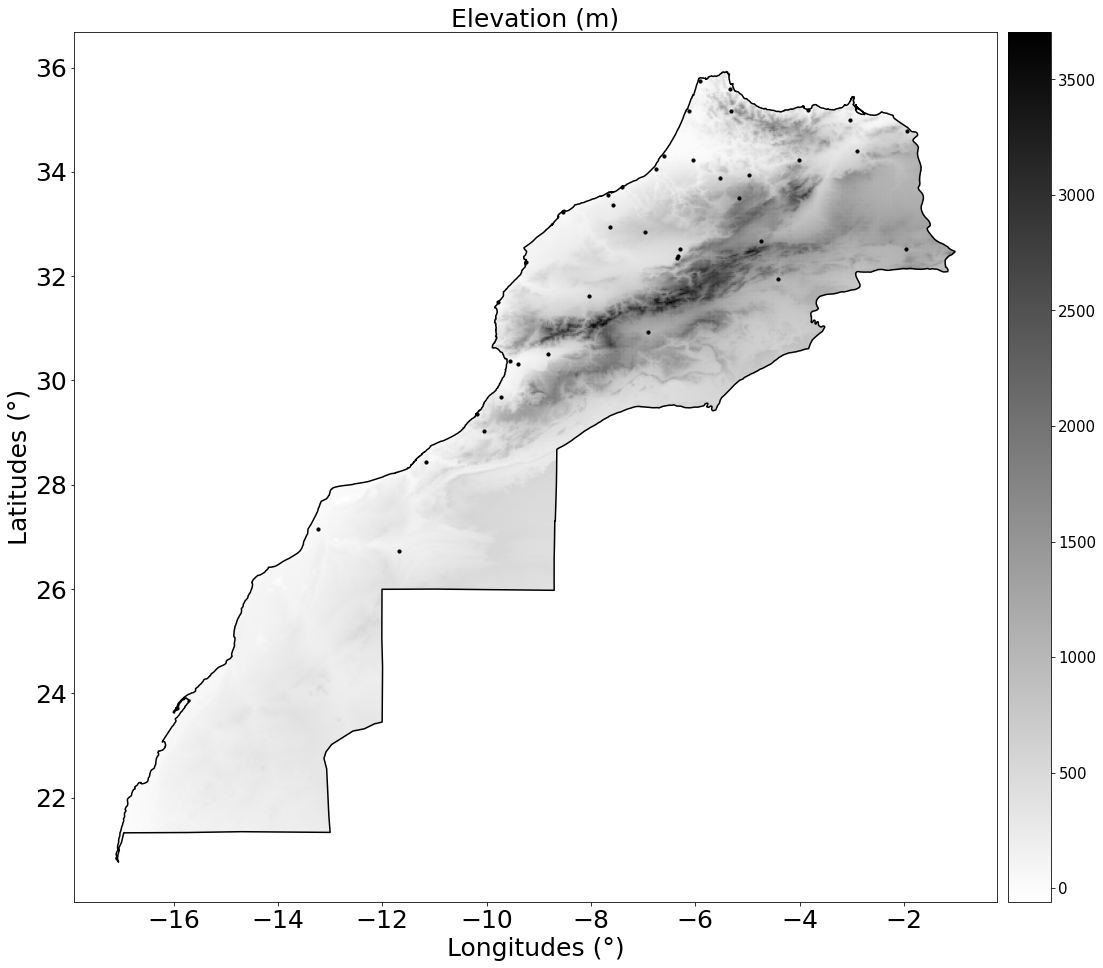

In [5]:
"""
Ce script permet de tracer l'orographie du modèle AROME sur le Maroc 
ou une partie du domaine ainsi que les stations du réseau synoptique
à partir d'un fichier de données ASCII sous le format : 
    Latitude - Longitude - Valeur du champ

Finalité : Tracer tout autre champ spatialement sur le Maroc

Mme Feddoul    Rhizlane    :  11/03/2022  Version originale
Mr  Lemkhenter Abderrazak  :  01/04/2022  Amélioration du script   

N.B.: En cas de conflit de packages, supprimer SVP le package 
Il est à noter que ce script a été testé sous python 3.6
"""
import pandas as pd
import numpy as np
import geopandas
from shapely.ops import unary_union
import matplotlib.pyplot as plt

"""
1- Lecture des données Elevation/Mask
"""  
data = np.loadtxt('INDTERREMER-ALT-AROME.dat')
Long = data[:,0]; Lat = data[:,1]; Elev = data[:,3]; Mask= data[:,2]

"""
Création d'un geopandas a partir des données Lat/Lon/Elev
"""
df  = pd.DataFrame({'X':Long, 'Y':Lat, 'Z':Elev})
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.X, df.Y), crs='epsg:4326')

"""
2- Lecture du shapeFile
(pour limiter le domaine de visualisation).
J'ai testé avec le shapefile regions/maroc (existant dans le même répertoire), mais ça n'a pas marché.
"""
shapefile = 'regions/regions.shp'
geodf = geopandas.read_file(shapefile)
geodf.crs = "EPSG:4326"

"""
Union des polygones pour avoir le Maroc comme un seul polygone pour pouvoir tracer le contour.
"""
polys=[]
for g in geodf.geometry:
    polys.append(g)
maroc = geopandas.GeoSeries(unary_union(polys))


"""
3- Lecture du fichier du réseau des stations
"""
stations=pd.read_csv('DGM-Network.csv')

def plot_use_shape_intersection(fig, ax):
    res=geopandas.overlay(gdf, geodf, how='intersection')
    cs = ax.scatter(res.X, res.Y,1, res.Z, cmap='gist_gray_r')
    ss = ax.scatter(stations.LON, stations.LAT, 10, color='black')
    ax.set_title('Elevation (m)', fontsize=25)
    ax.set_xlabel('Longitudes (°)', fontsize=25)
    ax.set_ylabel('Latitudes (°)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=25)
    cbar = fig.colorbar(cs, fraction=0.1, pad=0.01)
    cbar.ax.tick_params(labelsize=15)
    maroc.boundary.plot(ax=ax, color='k' )
    
"""
Utilisation de subplot et figsize pour paramétrer la taille de l'image
"""
fig, ax = plt.subplots(1, 1, figsize=(20,16))
plot_use_shape_intersection(fig, ax)
plt.savefig('Orography-AROME-Morocco.png')
plt.show()